{'../data/generated/predictions/evalpeaks_GM12878sp.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13', 'chr8', 'chr18', 'chr4', 'chr5', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21']), '../data/generated/predictions/evalpeaks_GM12878sp_CNN_testb.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13']), '../data/generated/predictions/evalpeaks_GM12878sp_LSTM_testb.npz': dict_keys(['chr1', 'chr11', 'chr20', 'chr13']), '../data/generated/predictions/evalpeaks_GM12878sp_dCNN_fig1.npz': dict_keys(['chr8', 'chr18', 'chr4', 'chr5', 'chr9', 'chr15', 'chr6', 'chr7', 'chr3', 'chr12', 'chr16', 'chr17', 'chr22', 'chr2', 'chr10', 'chr14', 'chr19', 'chr21', 'chr1', 'chr11', 'chr20', 'chr13'])}
Keeping chroms: ['chr1', 'chr11', 'chr13', 'chr20']
Shapes: [(33229, 512), (33229, 512), (33229, 512), (33229, 512)]


/opt/homebrew/Caskroom/miniconda/base/envs/OpenChromatinPrediction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


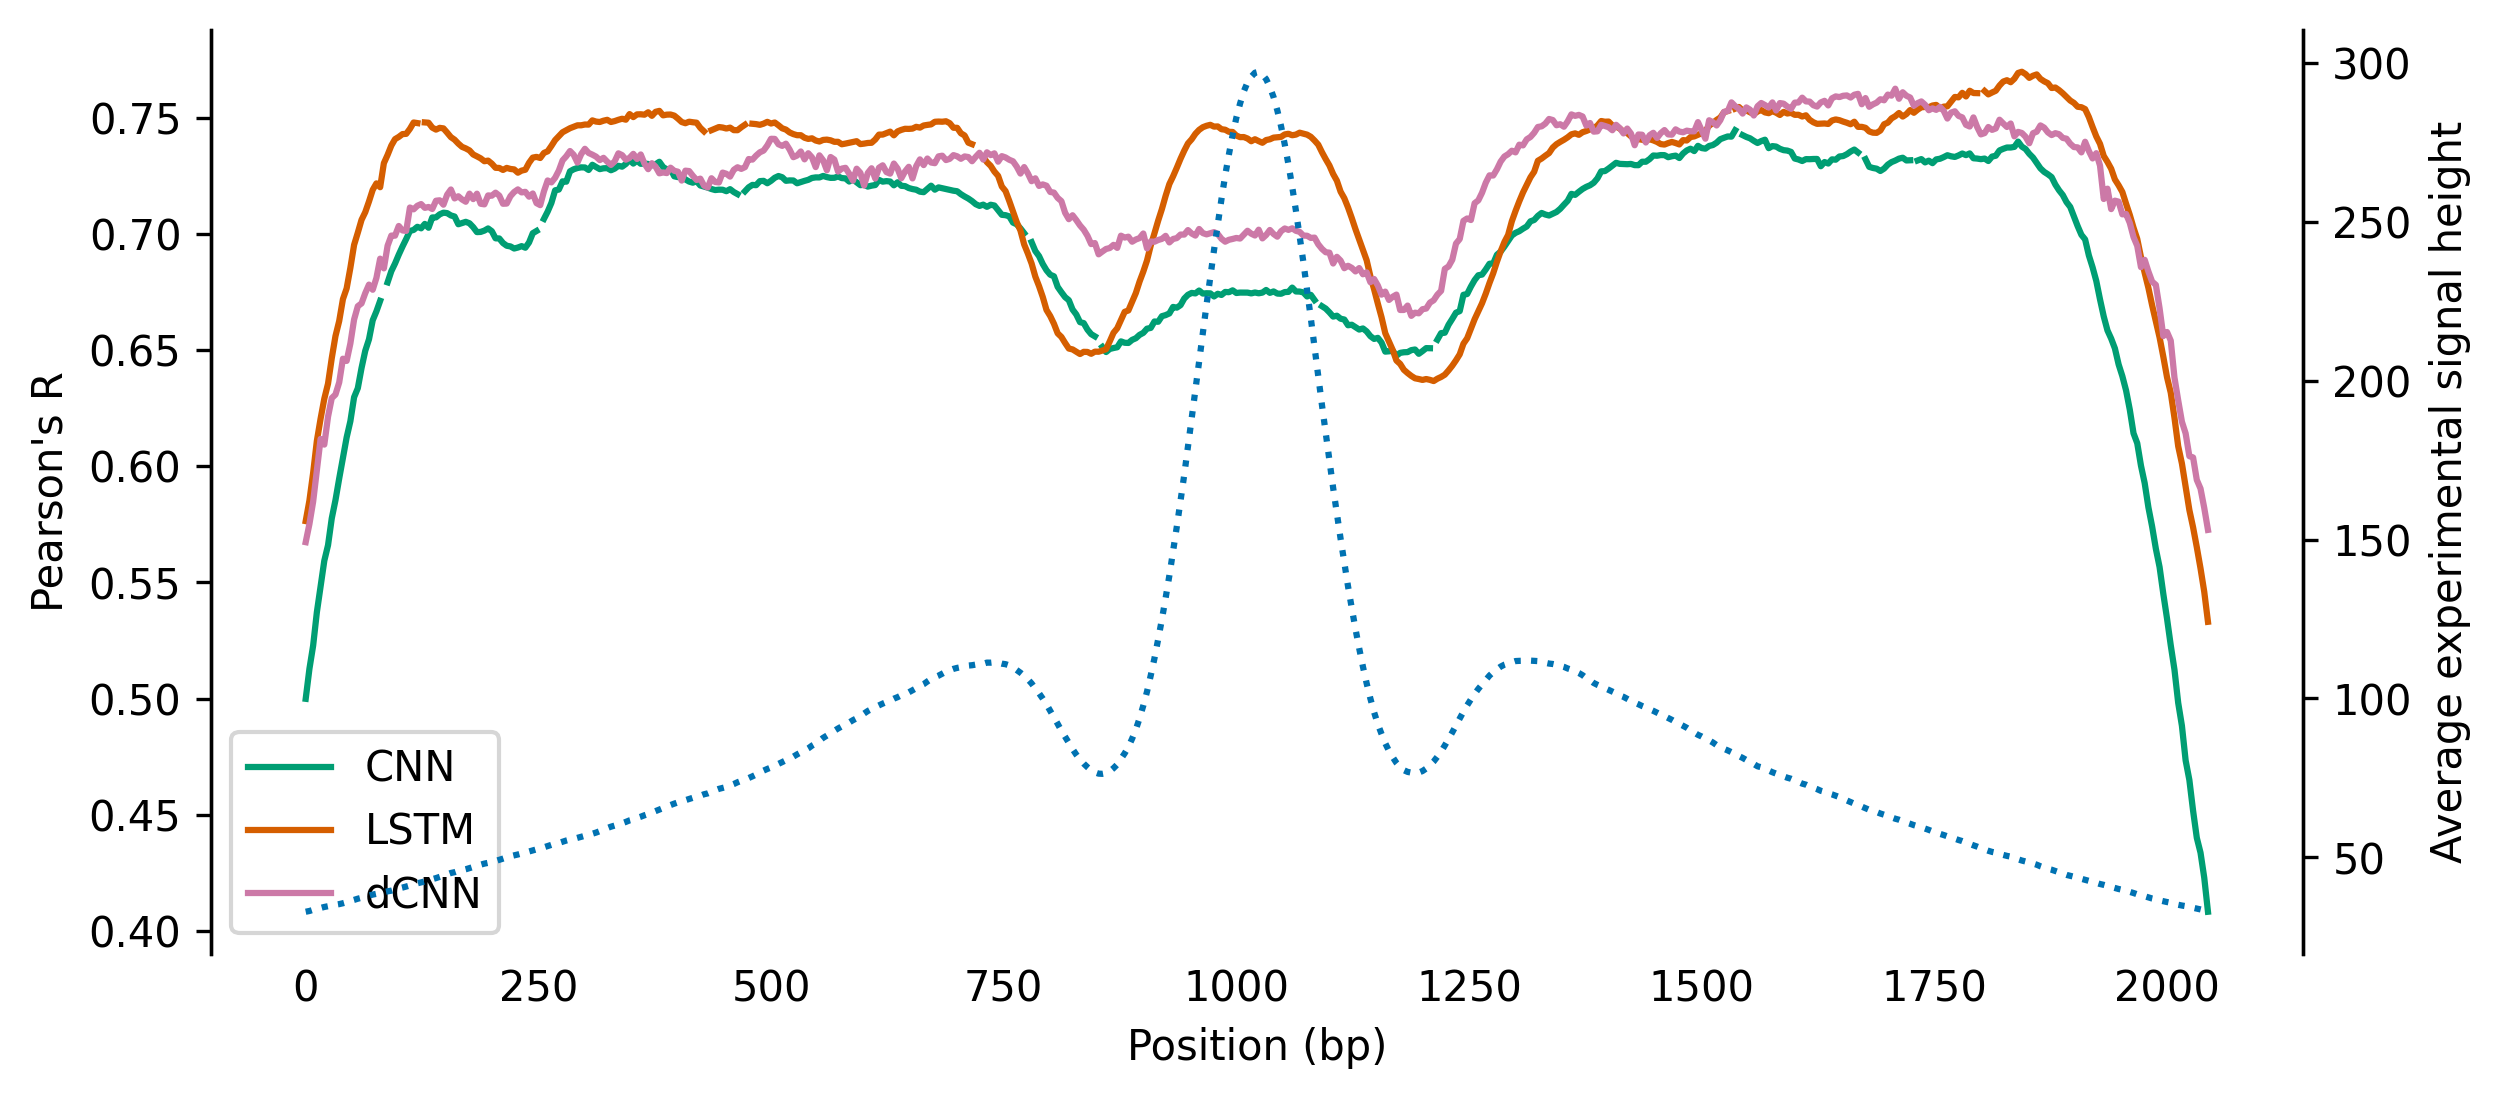

In [2]:
from notebooks.utils import get_ys_from_npzs
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

style.use('seaborn-v0_8-colorblind')

experiments = {
    'true': '../data/generated/predictions/evalpeaks_GM12878sp.npz',
    'CNN': '../data/generated/predictions/evalpeaks_GM12878sp_CNN_testb.npz',
    'LSTM': '../data/generated/predictions/evalpeaks_GM12878sp_LSTM_testb.npz',
    'dCNN': '../data/generated/predictions/evalpeaks_GM12878sp_dCNN_fig1.npz',
}


def plot_all_model_accuracy(name_to_file: dict[str, str]):
    fig, ax1 = plt.subplots(figsize=(9, 4), dpi=300)
    ax2 = ax1.twinx()

    x = np.arange(0, 2048, 4)
    ys = get_ys_from_npzs(list(name_to_file.values()), normalize=False)
    true_y = ys[0]
    ys = ys[1:]
    exp_names = list(name_to_file.keys())[1:]


    for exp_i, name, y in zip(range(len(ys)), exp_names, ys):
        corrs = [pearsonr(y[:, i], true_y[:, i])[0] for i in range(y.shape[1])]
        ax1.plot(x, corrs, label=name, c=f'C{exp_i + 1}')

    # plot average peak in ground truth
    avg_peak = true_y.mean(axis=0)
    ax2.plot(x, avg_peak, label='Average experimental peak', linestyle='dotted')

    # remove spines
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        # ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='x', length=0)

    ax1.legend()

    ax1.set_ylabel('Pearson\'s R')
    ax2.set_ylabel('Average experimental signal height')
    ax1.set_xlabel('Position (bp)')

    plt.savefig('supp_per_bin_accuracy.svg', format='svg')
    plt.show()


plot_all_model_accuracy(name_to_file=experiments)